In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [20]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= .2,random_state= 42)

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knc =  KNeighborsClassifier(n_neighbors = 1)

In [9]:
knc.fit(X_train,y_train)

C:\Users\chiwa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [10]:
y_pred = knc.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
accuracy_score(y_test,y_pred)

0.53125

In [13]:
confusion_matrix(y_test,y_pred)

array([[8, 0, 2, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 3, 0, 5, 0, 0],
       [0, 0, 2, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0],
       [0, 0, 1, 0, 2, 0, 0]], dtype=int64)

In [14]:
import numpy as np

In [21]:
knc =  KNeighborsClassifier(n_neighbors = 30)
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
print(accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

0.4375


array([[5, 0, 5, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 9, 0, 0, 0, 0],
       [1, 0, 2, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0]], dtype=int64)

In [19]:
X_train.shape,y_train.shape

((127, 6), (127, 1))

In [24]:
arr = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    arr.append(np.mean(pred_i != y_test))
    

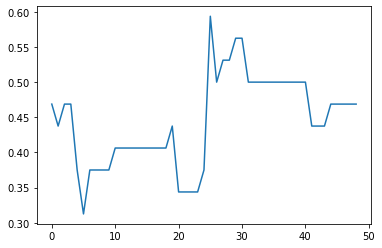

In [25]:
plt.plot(arr)
plt.show()